In [1]:
from typing import List

import numpy as np
import torch as t
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation, cm, cbook

from tqdm.notebook import tqdm

In [203]:
def U_paraboloid(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    x_hat = x - np.array([a, b])
    return c * x_hat.dot(x_hat)

def grad_U_paraboloid(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    x_hat = x - np.array([a, b])
    return 2 * c * x_hat

def U_valley(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return c * (x[0]-a)**2

def grad_U_valley(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return 2 * c * (x[0]-a)

def U_crossing(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return c * min((x[0]-a)**2, (x[1]-b)**2)

def grad_U_crossing(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return np.array([
        2 * c * max((x[0] - a), 0.),
        2 * c * max((x[1] - b), 0.),
    ])

def U(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return U_crossing(x, a=a, b=b, c=c)


def grad_U(x: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return grad_U_crossing(x, a=a, b=b, c=c)


def K(v: np.ndarray):
    return 1/2 * np.dot(v, v)

def accel(x: np.ndarray, v: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return -grad_U(x, a=a, b=b, c=c) 

def H(x: np.ndarray, v: np.ndarray, a: float = 0., b: float = 0., c: float = 1.):
    return U(x, a=a, b=b, c=c) + K(v)

# Plot the hamiltonian

def get_U_contour(a=0., b=0., c: float = 1, zlim=1., xlim=(-1, 1), ylim=(-1, 1)):
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = U(np.array([X[i, j], Y[i, j]]), a=a, b=b, c=c)

            if Z[i, j] > zlim:
                Z[i, j] = zlim

    return X, Y, Z

def get_stationary_dist_contour(a=0., b=0., c: float = 1, zlim=1., xlim=(-1, 1), ylim=(-1, 1)):
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            potential = U(np.array([X[i, j], Y[i, j]]), a=a, b=b, c=c)
            Z[i, j] = np.exp(-potential)

            if Z[i, j] > zlim:
                Z[i, j] = zlim

    return X, Y, Z

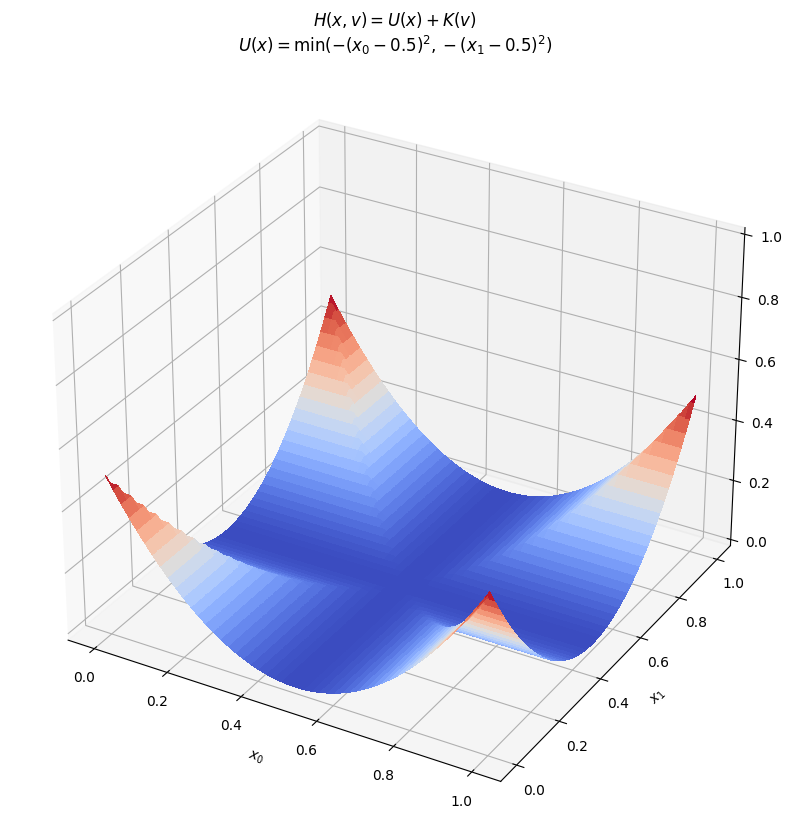

In [204]:

def plot_U_3D(a=0., b=0., c: float = 1, zlim=1., xlim=(-1, 1), ylim=(-1, 1)):
    X, Y, Z = get_U_contour(a=a, b=b, c=c, zlim=zlim, xlim=xlim, ylim=ylim)

    # In 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Max height = 1
    ax.set_zlim(0, zlim)

    ax.set_title(f"$H(x, v) = U(x) + K(v)$\n$U(x) = \min(-(x_0-{a})^2, -(x_1-{b})^2)$")
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    
    return fig, ax

plot_U_3D(a=0.5, b=0.5, c=2, xlim=(0, 1), ylim=(0, 1))
plt.show()

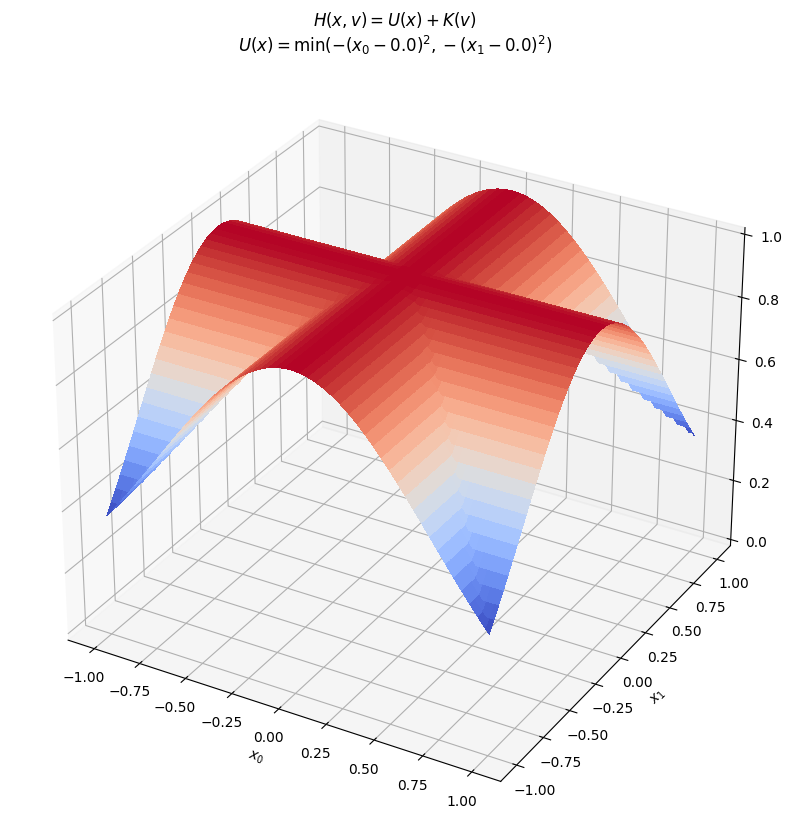

In [205]:
def plot_stationary_dist_3D(a=0., b=0., c: float = 1, zlim=1., xlim=(-1, 1), ylim=(-1, 1)):
    X, Y, Z = get_stationary_dist_contour(a=a, b=b, c=c, zlim=zlim, xlim=xlim, ylim=ylim)

    # In 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Max height = 1
    ax.set_zlim(0, zlim)

    ax.set_title(f"$H(x, v) = U(x) + K(v)$\n$U(x) = \min(-(x_0-{a})^2, -(x_1-{b})^2)$")
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    
    return fig, ax

plot_stationary_dist_3D()
plt.show()

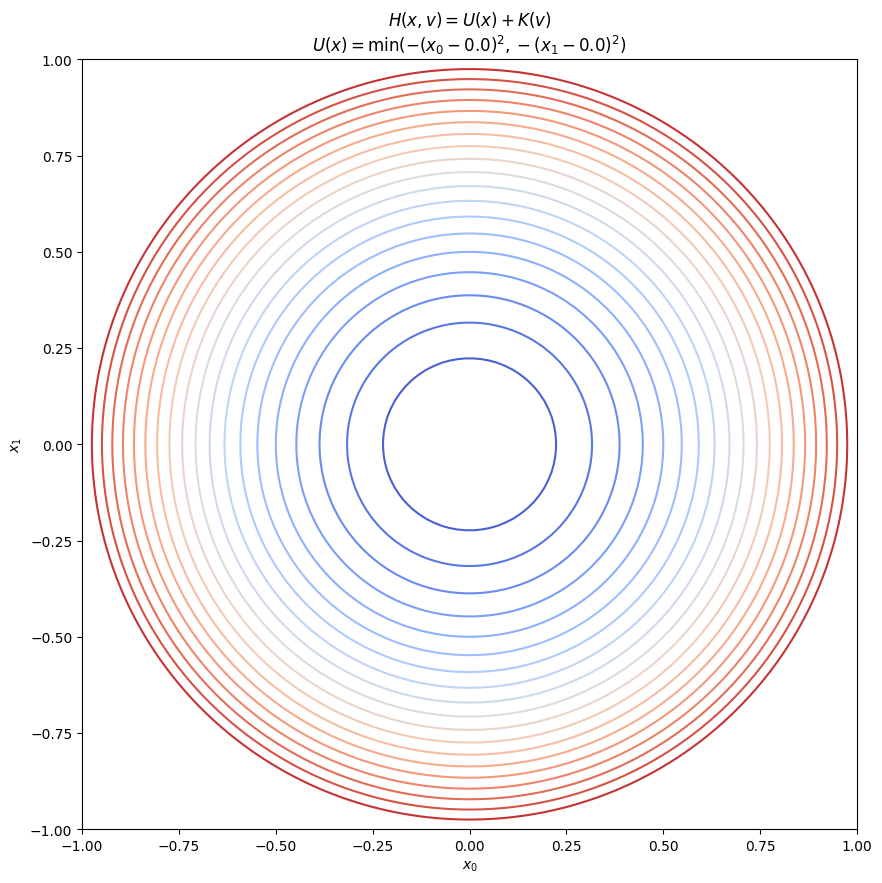

In [113]:
def plot_U_2D(a=0., b=0., c: float = 1, zlim=1., xlim=(-1, 1), ylim=(-1, 1)):
    X, Y, Z = get_U_contour(a=a, b=b, c=c, zlim=zlim, xlim=xlim, ylim=ylim)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contour(X, Y, Z, levels=20, cmap=cm.coolwarm)
    ax.set_title(f"$H(x, v) = U(x) + K(v)$\n$U(x) = \min(-(x_0-{a})^2, -(x_1-{b})^2)$")
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    
    return fig, ax

plot_U_2D()
plt.show()

In [195]:
def simulate_particle(
    a = 0., 
    b = 0., 
    c: float = 1., 
    x0: np.ndarray = np.array([0., 0.]), 
    v0: np.ndarray = np.array([0., 0.]), 
    dt: float = 0.01, 
    n_steps: int = 1000, 
    noise: float = 0., 
    xlim=(-1., 1.), 
    ylim=(-1., 1.)
):
    x = x0
    v = v0

    xs = [x]
    vs = [v]

    E_old = H(x, v, a=a, b=b, c=c)

    for i in tqdm(range(n_steps), desc="Simulating particle..."):

        # Metroplis-Hastings step
        x_new = x + dt * (v + np.random.normal(0, noise, size=2))
        v_new = v + dt * np.random.normal(0, noise, size=2)

        E_new = H(x_new, v_new, a=a, b=b, c=c)
        # E_old = H(x, v, a=a, b=b, c=c) 

        if np.random.uniform() < np.exp(-(E_new - E_old)):
            x = x_new
            v = v_new

        # acc = accel(x, v, a=a, b=b, c=c) 
        # x = x + dt * (v + np.random.normal(0, noise, size=2)) + 1/2 * dt**2 * acc
        # v = v + dt * acc

        # Toroidal boundary conditions
        x[0] = (x[0] - xlim[0]) % (xlim[1] - xlim[0]) + xlim[0]
        x[1] = (x[1] - ylim[0]) % (ylim[1] - ylim[0]) + ylim[0]

        # Rescale velocity to keep energy constant
        # k_budget = E0 - U(x, a=a, b=b, c=c)
        # k_current = K(v)

        # if k_current > k_budget and k_current > 0.1:
        #     v *= np.sqrt(k_budget / k_current) 

        xs.append(x)
        vs.append(v)

    return np.array(xs), np.array(vs)

xs, vs = simulate_particle(dt=0.01, v0=np.array([0, 0]), n_steps=10_000, noise=1)

Simulating particle...:   0%|          | 0/10000 [00:00<?, ?it/s]

In [196]:
def particle_stats(xs, vs):

    df = pd.DataFrame(np.concatenate([xs, vs], axis=1), columns=["x0", "x1", "v0", "v1"])

    df["K"] = df.apply(lambda row: K(np.array([row["v0"], row["v1"]])), axis=1)
    df["U"] = df.apply(lambda row: U(np.array([row["x0"], row["x1"]])), axis=1)
    df["H"] = df.apply(lambda row: H(np.array([row["x0"], row["x1"]]), np.array([row["v0"], row["v1"]])), axis=1)

    return df

df = particle_stats(xs, vs)
df

,x0,x1,v0,v1,K,U,H
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.017049,0.010724,0.009348,0.015269,0.000160,0.000406,0.000566
2,-0.004148,0.008701,0.021924,0.012783,0.000322,0.000093,0.000415
3,-0.008702,0.012349,0.025304,0.009131,0.000362,0.000228,0.000590
4,-0.001939,0.009956,0.014908,-0.011689,0.000179,0.000103,0.000282
...,...,...,...,...,...,...,...
9996,-0.403669,-0.584241,0.412620,-0.049305,0.086343,0.504286,0.590629
9997,-0.394736,-0.595580,0.422862,-0.047134,0.090517,0.510532,0.601049
9998,-0.379688,-0.590096,0.416968,-0.047693,0.088068,0.492377,0.580445
9999,-0.379688,-0.590096,0.416968,-0.047693,0.088068,0.492377,0.580445


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Energy over time'}, xlabel='Time', ylabel='Energy'>)

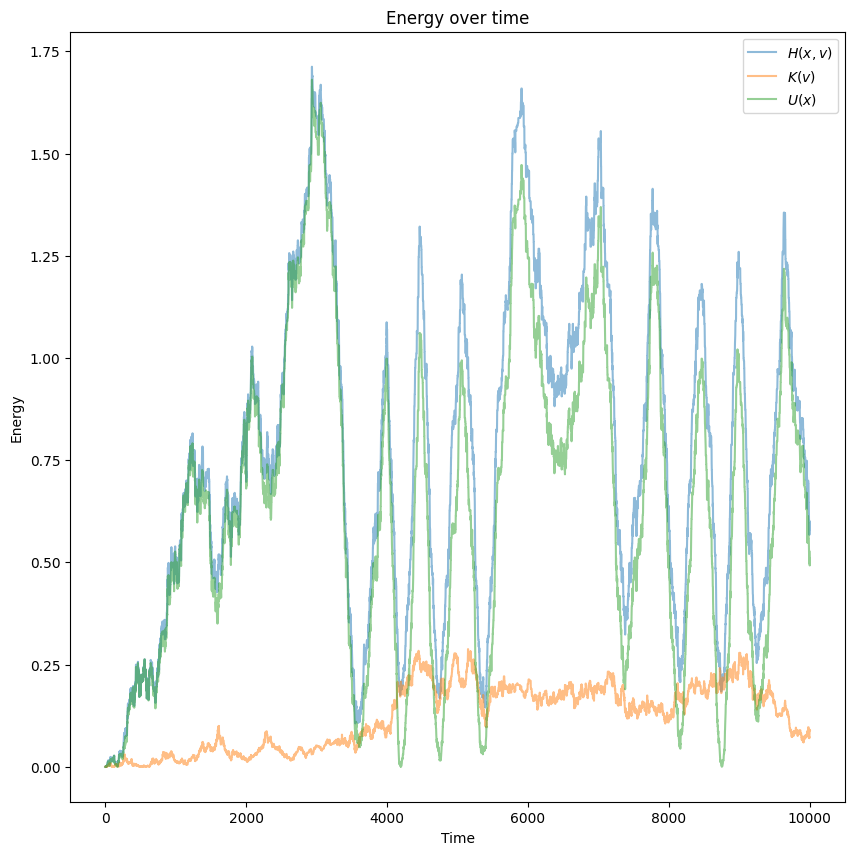

In [199]:
# Energy over time
def plot_energy(df):
    fig, ax = plt.subplots(figsize=(10, 10))

    df.plot(y="H", ax=ax, label="$H(x, v)$", alpha=0.5)
    df.plot(y="K", ax=ax, label="$K(v)$", alpha=0.5)
    df.plot(y="U", ax=ax, label="$U(x)$", alpha=0.5)

    ax.set_title("Energy over time")
    ax.set_xlabel("Time")
    ax.set_ylabel("Energy")

    return fig, ax

plot_energy(df)

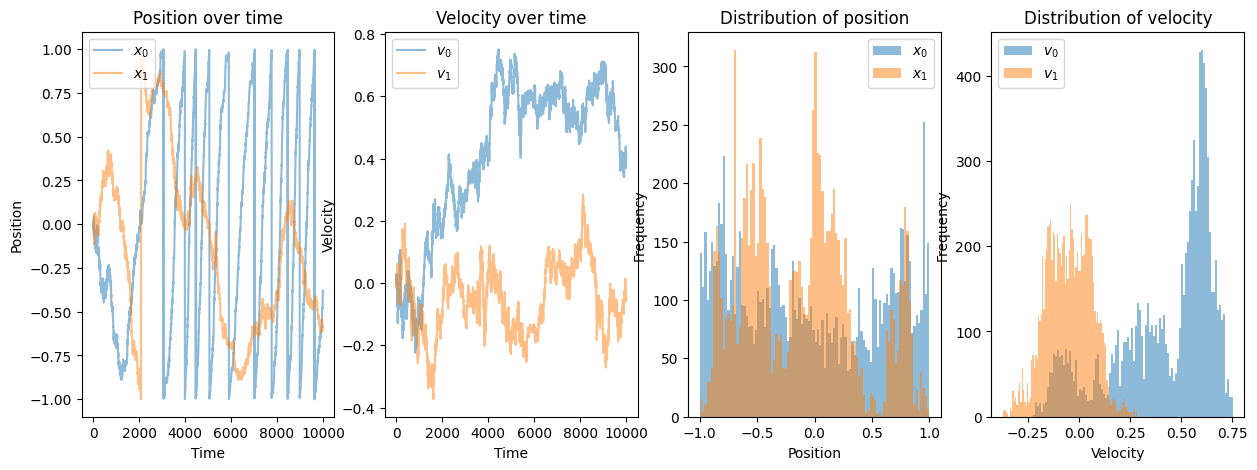

In [198]:
# Position and velocity over time
def plot_position_velocity(df):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    # Position
    df.plot(y="x0", ax=axes[0], label="$x_0$", alpha=0.5)
    df.plot(y="x1", ax=axes[0], label="$x_1$", alpha=0.5)

    axes[0].set_title("Position over time")
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Position")

    # Velocity
    df.plot(y="v0", ax=axes[1], label="$v_0$", alpha=0.5)
    df.plot(y="v1", ax=axes[1], label="$v_1$", alpha=0.5)

    axes[1].set_title("Velocity over time")
    axes[1].set_xlabel("Time")
    axes[1].set_ylabel("Velocity")

    # Plot distribution
    df.plot(y="x0", kind="hist", ax=axes[2], label="$x_0$", bins=100, alpha=0.5)
    df.plot(y="x1", kind="hist", ax=axes[2], label="$x_1$", bins=100, alpha=0.5)

    axes[2].set_title("Distribution of position")
    axes[2].set_xlabel("Position")
    axes[2].set_ylabel("Frequency")
    
    df.plot(y="v0", kind="hist", ax=axes[3], label="$v_0$", bins=100, alpha=0.5)
    df.plot(y="v1", kind="hist", ax=axes[3], label="$v_1$", bins=100, alpha=0.5)

    axes[3].set_title("Distribution of velocity")
    axes[3].set_xlabel("Velocity")
    axes[3].set_ylabel("Frequency")

    return fig, axes

fig, axes = plot_position_velocity(df)

Animating particle...:   0%|          | 0/100 [00:00<?, ?it/s]

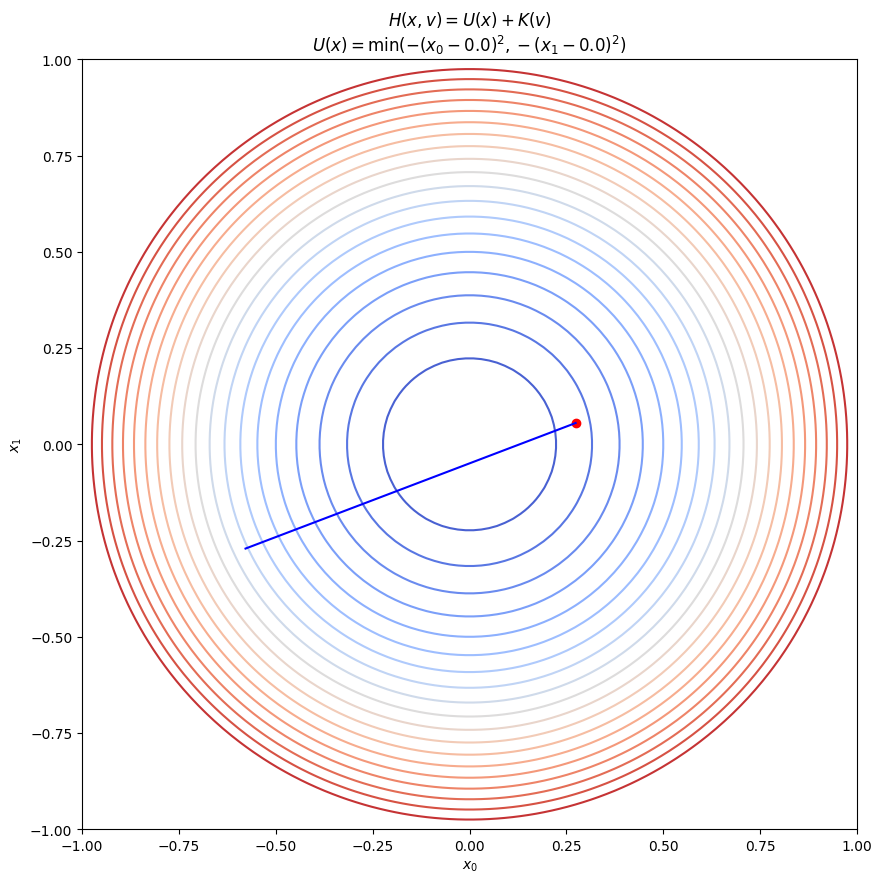

In [166]:
def animate_particle(xs: np.ndarray, vs: np.ndarray, a=0., b=0., c: float = 1., zlim=1., xlim=(-1, 1), ylim=(-1,1), fps: int = 30, save: bool = False, filename: str = "particle.mp4"):
    # Draw the point
    X, Y, Z = get_U_contour(a=a, b=b, c=c, zlim=zlim, xlim=xlim, ylim=ylim)

    # In 2D
    fig, ax = plot_U_2D(a=a, b=b, c=c, zlim=zlim, xlim=xlim, ylim=ylim)

    # Draw the point
    point, = ax.plot([], [], 'o', color="red")

    # Draw the velocity (as an arrow)
    velocity, = ax.plot([], [], color="blue")

    # Animation loop

    progress = tqdm(total=len(xs), desc="Animating particle...")

    def animate(i):
        point.set_data(xs[i, 0], xs[i, 1])
        velocity.set_data([xs[i, 0], xs[i, 0] + vs[i, 0]], [xs[i, 1], xs[i, 1] + vs[i, 1]])

        progress.update(1)

        return point, velocity
    
    anim = animation.FuncAnimation(fig, animate, frames=len(xs), interval=10_000/fps, blit=True)

    if save:
        anim.save(filename, fps=fps, extra_args=['-vcodec', 'libx264'])

    return anim


animate_particle(xs[:10_0], vs[:10_0], fps=30, save=True, filename="particle.mp4")